In [1]:
with open ("bible.txt", "r") as myfile:
    bible = myfile.readlines()

In [2]:
bible[0]

'Genesis 1:1\tIn the beginning God created the heaven and the earth.\n'

In [3]:
type(bible)

list

In [4]:
import pandas as pd

In [5]:
bible = list(map(lambda x: str(x).split('\t'), bible))

In [6]:
df_bible = pd.DataFrame(list(bible))

In [7]:
df_bible.columns = ['Verse', 'Text']

In [8]:
df_bible['Text'] = df_bible['Text'].apply(lambda x: x.rstrip('\n'))

In [9]:
df_bible.tail()

,Verse,Text
31097,Revelation 22:17,"And the Spirit and the bride say, Come. And le..."
31098,Revelation 22:18,For I testify unto every man that heareth the ...
31099,Revelation 22:19,And if any man shall take away from the words ...
31100,Revelation 22:20,"He which testifieth these things saith, Surely..."
31101,Revelation 22:21,The grace of our Lord Jesus Christ be with you...


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
len_verse = df_bible['Text'].apply(lambda x:len(x))

In [13]:
len_verse.head()

0     54
1    142
2     54
3     85
4    115
Name: Text, dtype: int64

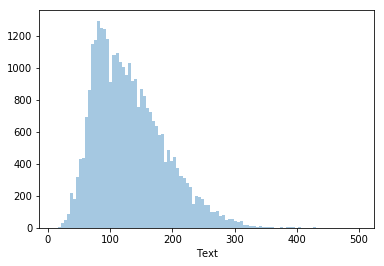

In [14]:
sns.distplot(len_verse, bins=100,kde=False)

In [15]:
df_bible['Text'].head()

0    In the beginning God created the heaven and th...
1    And the earth was without form, and void; and ...
2    And God said, Let there be light: and there wa...
3    And God saw the light, that it was good: and G...
4    And God called the light Day, and the darkness...
Name: Text, dtype: object

In [16]:
df_bible['Just letters'] = df_bible['Text'].apply(lambda string: ''.join(e for e in string if e.isalnum()))

In [17]:
df_bible['Just letters'].loc[0]

'InthebeginningGodcreatedtheheavenandtheearth'

In [18]:
df_bible['Len Letters'] = df_bible['Just letters'].apply(lambda x:len(x))

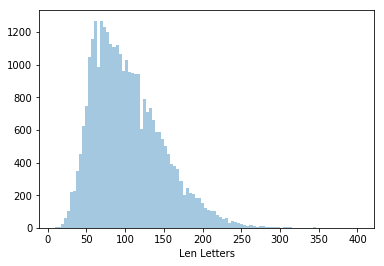

In [19]:
sns.distplot(df_bible['Len Letters'],kde=False, bins=100)

In [20]:
df_bible['Len Letters'].value_counts().head()

65    349
66    345
71    341
64    335
63    330
Name: Len Letters, dtype: int64

In [21]:
df_bible['Len Letters'].mean()

103.59709986496046

In [22]:
df_bible['Text'].value_counts()

And the LORD spake unto Moses, saying,                                                                                                                                                                                                     72
One kid of the goats for a sin offering:                                                                                                                                                                                                   12
One young bullock, one ram, one lamb of the first year, for a burnt offering:                                                                                                                                                              12
And the word of the LORD came unto me, saying,                                                                                                                                                                                             12
One golden spoon of ten shekels, full of incense

In [23]:
df_bible['Len Words'] = df_bible['Text'].apply(lambda x:len(x.split()))

In [24]:
df_bible[['Text','Len Words']].head()

,Text,Len Words
0,In the beginning God created the heaven and th...,10
1,"And the earth was without form, and void; and ...",29
2,"And God said, Let there be light: and there wa...",11
3,"And God saw the light, that it was good: and G...",17
4,"And God called the light Day, and the darkness...",22


In [25]:
df_bible['Text'].loc[0]

'In the beginning God created the heaven and the earth.'

In [26]:
with open ("bible.txt", "r") as myfile:
    bible = myfile.readlines()

In [27]:
bible = list(map(lambda x: str(x).split('\t'), bible))

In [28]:
bible = pd.DataFrame(list(bible))

In [29]:
bible.columns = ['Verse', 'Text']

In [30]:
str_whole_bible = ''
for i in bible['Text']:
    str_whole_bible += i

In [31]:
str_whole_bible = str_whole_bible.replace('\n', ' ')

In [32]:
len(str_whole_bible)

4137428

In [33]:
import re
whole_bible = re.sub(r'([^\s\w]|_)+', '', str_whole_bible)

In [34]:
whole_bible = pd.DataFrame(whole_bible.split())

In [35]:
whole_bible[1] = whole_bible[0].apply(lambda x: x.lower())

In [37]:
len(whole_bible[1])

789627

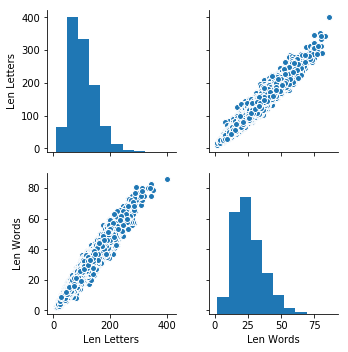

In [38]:
sns.pairplot(df_bible)

In [39]:
import string

In [40]:
import nltk

In [48]:
one_time = whole_bible[1].value_counts() == 1
one_time.value_counts()

False    8708
True     4019
Name: 1, dtype: int64